# Cálculo numérico con numpy

## Introducción

De la página [web de Numpy](https://numpy.org/), *Numpy* proporciona: matrices N-dimensionales, funciones para operar con dichas matrices, incluso mezclando distintos tamaños (*broadcasting*), funciones del álgebra lineal, transformadas de Fourier y números aleatorios. Adicionalmente añade tipos de datos numéricos de tamaño distinto al básico, por ejemplo, enteros de 16 bits (int16), complejos y otras utilidades. 

*Numpy* se usa como parte, más o menos integrada, de los paquetes de análisis numéricos que se pueden consultar en [Web de Scipy](https://scipy.org/). 

## Trabajar con numpy

Trabajar con *Numpy* significa, fundamentalmente, manejar el objeto matriz (`numpy.array`). Vamos a hacer unos pocos ejemplos para manejar este objeto en 3 contextos: álgebra lineal, datos tabulares y funciones *element-wise* y estadística elemental. Además haremos un problema para ilustrar los conceptos de vista y copia en profundidad.

Como en otros casos, la documentación oficial es muy explicativa y extensa. Podéis encontrar tutoriales y documentación adicional en: [Documentación Numpy](https://numpy.org/devdocs/user/quickstart.html). 

## Cálculo numérico

Numpy tiene distintas capacidades en relación con aspectos básicos del cálculo numérico. Un ejemplo interesante es la transformada rápida de Fourier (FFT). Se puede encontrar una explicación de esta transformada en [FFT](https://docs.scipy.org/doc/numpy/reference/routines.fft.html), especialmente en el apartado de *background*. En resumen, la FFT se usa para hacer análisis en frecuencia de una señal y sirve para todo tipo de utilidades, por ejemplo: filtros, interpolación, compresión de datos, etc. 

La ventaja de un paquete con capacidades de cálculo científico es que muchas (la mayoría) de las funciones más habituales y útiles están disponibles sin tener que programar una sola línea de código, eso sí, hay que aprender a leer y comprender la documentación asociada y a usar la correspondiente función (o clase, objecto, API, ...). 

En el ejemplo en que vamos a trabajar, aprenderemos de paso lo que significa una función *element-wise*, básicamente consiste en aplicar la misma función u operación a todos los elementos de una estructura, naturalmente sin escribir el bucle, ese bucle queda oculto en la implementación de las funciones *element-wise* que vamos a utilizar.


## Filtro en frecuencia

Vamos a hacer un filtro en frecuencia que elimine los armónicos con componentes más pequeñas mediante la aplicación de la FFT y su anti-transformada. 

Pero, en primer lugar, vamos a ver cómo generar de forma sencilla y utilizando las operaciones *element-wise*, una onda para trabajar con ella. En concreto, vamos a:

* Generar una onda sinusoidal 
* Vamos a mostrarla en una gráfica
* Luego vamos a añadir ruido blanco
* Y finalmente probaremos a añadir más armónicos

Empecemos generando la onda y su gráfica:



In [2]:
# Importamos numpy
import numpy as np

# Genera un vector con los valores de ángulos que vamos a usar (en radianes)
ang = np.arange(0, 4 * np.pi, 4 * np.pi / 128)

ang

array([ 0.        ,  0.09817477,  0.19634954,  0.29452431,  0.39269908,
        0.49087385,  0.58904862,  0.68722339,  0.78539816,  0.88357293,
        0.9817477 ,  1.07992247,  1.17809725,  1.27627202,  1.37444679,
        1.47262156,  1.57079633,  1.6689711 ,  1.76714587,  1.86532064,
        1.96349541,  2.06167018,  2.15984495,  2.25801972,  2.35619449,
        2.45436926,  2.55254403,  2.6507188 ,  2.74889357,  2.84706834,
        2.94524311,  3.04341788,  3.14159265,  3.23976742,  3.33794219,
        3.43611696,  3.53429174,  3.63246651,  3.73064128,  3.82881605,
        3.92699082,  4.02516559,  4.12334036,  4.22151513,  4.3196899 ,
        4.41786467,  4.51603944,  4.61421421,  4.71238898,  4.81056375,
        4.90873852,  5.00691329,  5.10508806,  5.20326283,  5.3014376 ,
        5.39961237,  5.49778714,  5.59596191,  5.69413668,  5.79231146,
        5.89048623,  5.988661  ,  6.08683577,  6.18501054,  6.28318531,
        6.38136008,  6.47953485,  6.57770962,  6.67588439,  6.77

donde la función `arange` es una forma conveniente de lograr valores incrementados de forma uniforme, muy útil para tener algo así como un eje de coordenadas discretizado.

Es _muy_ importante generar este vector de manera que tenga un número de elementos que sea potencia de dos (es un requisito para FFT). Por eso lo comprobamos:


In [3]:
ang.shape

(128,)

Ahora aplicamos una función de las que son *element-wise*, es importante ver como este función seno no es que la viene del paquete *math* sino del propio numpy. Y además, su argumento es un vector.

In [4]:
seno = np.sin(ang)

seno


array([ 0.00000000e+00,  9.80171403e-02,  1.95090322e-01,  2.90284677e-01,
        3.82683432e-01,  4.71396737e-01,  5.55570233e-01,  6.34393284e-01,
        7.07106781e-01,  7.73010453e-01,  8.31469612e-01,  8.81921264e-01,
        9.23879533e-01,  9.56940336e-01,  9.80785280e-01,  9.95184727e-01,
        1.00000000e+00,  9.95184727e-01,  9.80785280e-01,  9.56940336e-01,
        9.23879533e-01,  8.81921264e-01,  8.31469612e-01,  7.73010453e-01,
        7.07106781e-01,  6.34393284e-01,  5.55570233e-01,  4.71396737e-01,
        3.82683432e-01,  2.90284677e-01,  1.95090322e-01,  9.80171403e-02,
        1.22464680e-16, -9.80171403e-02, -1.95090322e-01, -2.90284677e-01,
       -3.82683432e-01, -4.71396737e-01, -5.55570233e-01, -6.34393284e-01,
       -7.07106781e-01, -7.73010453e-01, -8.31469612e-01, -8.81921264e-01,
       -9.23879533e-01, -9.56940336e-01, -9.80785280e-01, -9.95184727e-01,
       -1.00000000e+00, -9.95184727e-01, -9.80785280e-01, -9.56940336e-01,
       -9.23879533e-01, -

Efectivamente: la función `np.sin` no toma un valor como argumento sino un vector y su resultado también es un vector, el resultado de aplicar el *seno(x)* a todas las componentes del vector. Esto es precisamente *element-wise*.

Ahora vamos a visualizarlo (cambiamos el tamaño de las gráficas para que se vea mejor):

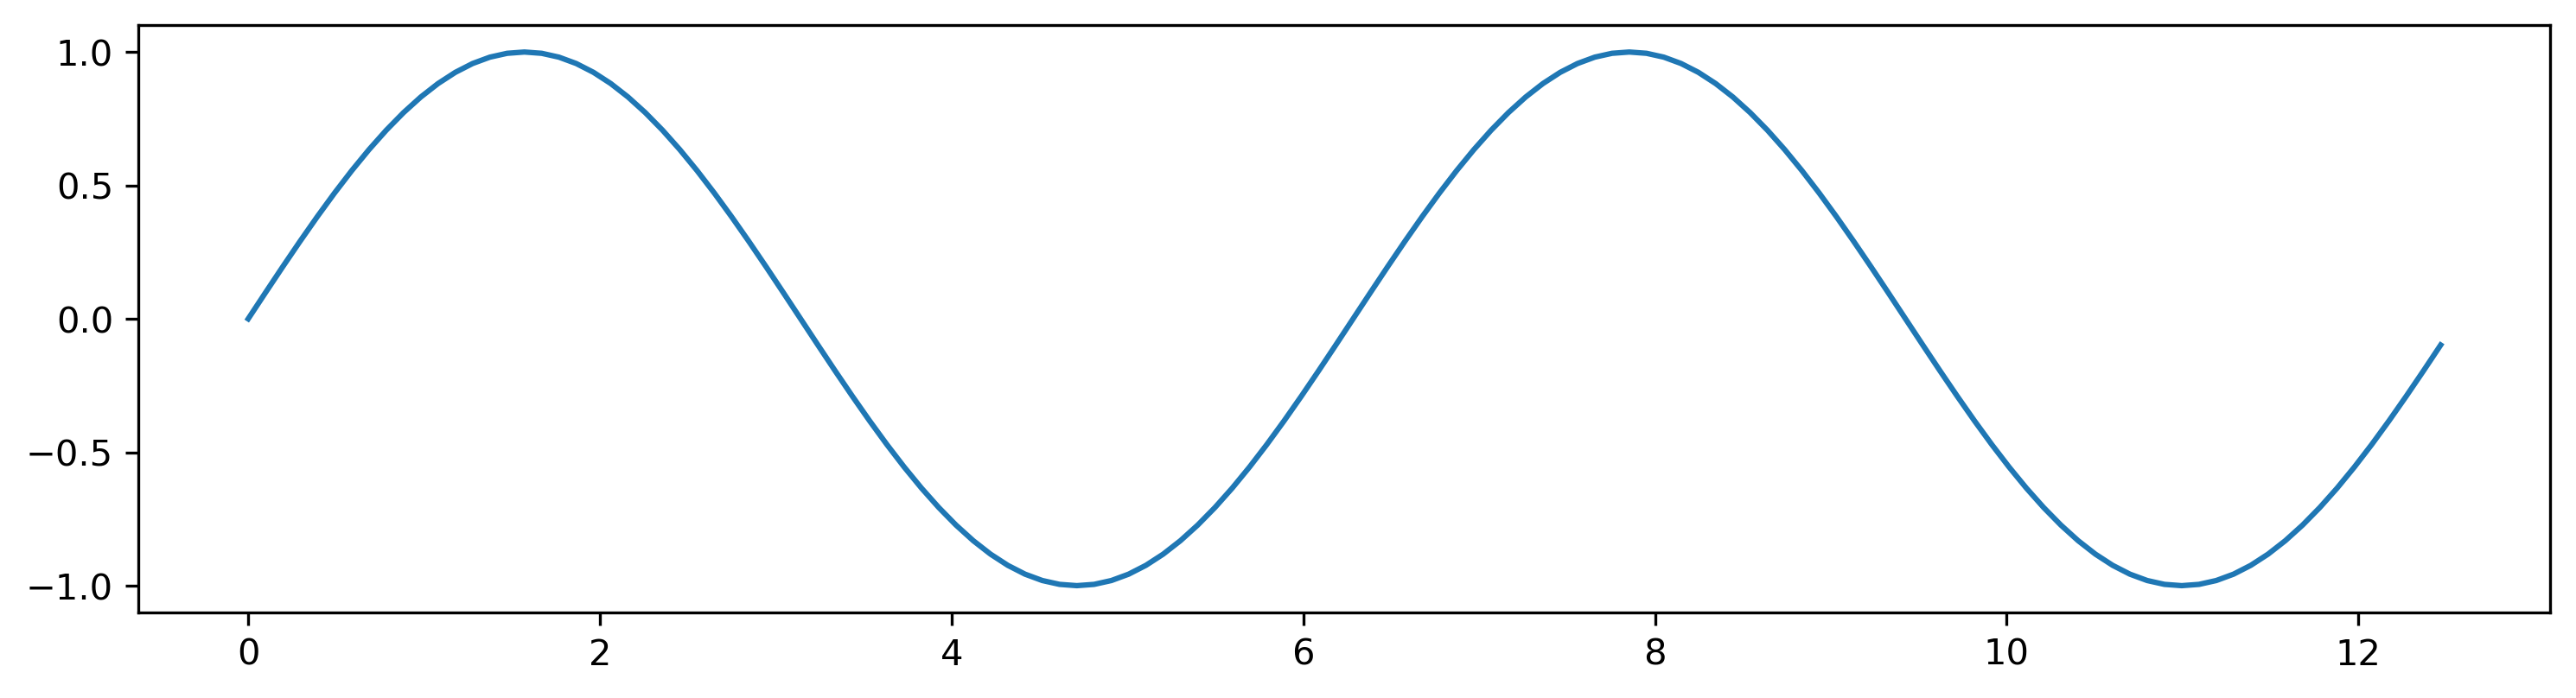

In [5]:

import matplotlib.pyplot as plt

# Para hacer las gráficas más grandes
plt.rcParams['figure.figsize'] = [12, 3]

# Y con más resolución
plt.rcParams['figure.dpi'] = 300

plt.plot(ang, seno)


Como veis se observa la gráfica del seno... Claro.

Ahora vamos a añadir el ruido:

In [6]:
ruido = 0.15*(np.random.rand(128)-0.5)

onda = seno + ruido 

onda

array([-0.072208  ,  0.15742383,  0.14683764,  0.22610168,  0.40132988,
        0.41294989,  0.51515511,  0.67693208,  0.73235567,  0.8414231 ,
        0.88217352,  0.92131546,  0.9478233 ,  0.91556366,  1.05174534,
        0.93480786,  0.95081673,  1.00002483,  1.04108098,  0.9147643 ,
        0.9759572 ,  0.85629537,  0.85172853,  0.72068832,  0.67000954,
        0.6340517 ,  0.53702666,  0.50123544,  0.35327076,  0.25437677,
        0.25177631,  0.05840299, -0.02558485, -0.11475989, -0.20368766,
       -0.32708871, -0.39258042, -0.43712165, -0.58156639, -0.56936103,
       -0.75350773, -0.83593338, -0.86796542, -0.8373837 , -0.95803062,
       -0.94156981, -1.04817492, -0.962994  , -1.02731021, -1.01842916,
       -0.9679628 , -1.00803368, -0.94989274, -0.81443132, -0.83118907,
       -0.72186918, -0.66311806, -0.5841636 , -0.60236323, -0.54183866,
       -0.44045283, -0.301734  , -0.2119595 , -0.12416487, -0.06907445,
        0.0555287 ,  0.12486895,  0.36195547,  0.36625048,  0.53

Donde: 
    
* En la línea 1 se pueden ver dos operaciones aritmeticas *element-wise*, la resta y el producto
* El la línea 3 se puede observar la suma de los dos vectores
    
Para generar los números aleatorios se ha utilizado otra función de numpy. Para que el ruido tenga media cero se ha restado por 1/2 porque el rango de generación original es entre 0 y 1. Y se ha reducido su amplitud a 0.15 para que sea pequeño en relación con el valor de la onda sinusoidal.

Ahora debéis seguir por vuestra cuenta. Os voy poniendo que hay que hacer.

In [7]:

# Lo primero siempre ir comprobando el resultado paso a paso. Busca como mostrar la onda original
# y la onda con el ruido en la misma gráfica. 


Aplicamos la transformada y mostramos el resultado de la misma. Para ello, hay que fijarse en que la FFT tiene dos versiones: una general para valores en el dominio de los números complejos y otra para valores reales. La que tenemos que usar es la de valores reales. Hay que fijarse bien, los nombres de las funciones son muy parecidos. También hay que fijarse que fft es un módulo dentro de numpy, hay que escribir fft como prefijo del nombre de la función.

In [8]:
# LLama a la función para hacer la transformada. 
# Y guarda el resultado en alguna variable, por ejemplo: tran


# Comprueba que el tamaño del resultado es 65! 



El tamaño es una comprobación sencilla, es este caso te permite saber que has llamado a la función correcta (la otra devuelve un resultado de 128). Pero, además viene bien ver gráficamente que hemos conseguido. Muestra el resultado gráficamente, pero usa mejor un gráfico de barras, la función es *bar* en vez de *plot*... Puede ser que no te salga a la primera, piensa qué tienes que poner para ver el resultado. 

In [9]:

# Muestra el resultado con plt.bar



Ahora viene la parte del filtro propiamente dicha. En primer lugar vamos a fabricar un filtro muy sencillo con una función que devuelve el mismo valor que se le pasa como parámetro si su módulo es mayor que 10 o 0 en caso contrario. El modulo de un número complejo se calcula con abs. La función trabaja con número complejos porque el resultado de FFT son números complejos. 

In [10]:

# Define la función filtro

# Es conveniente comprobar que es correcta (pero opcional, al final y al cabo es muy sencilla)


La función filtro no puede tomar como argumento un vector. Afortunadamente, numpy tiene una utilidad para transformar nuestra función en otra función "vectorizada" o *element-wise*. Consulta la función `numpy.vectorize`. Y utilizala para obtener otra función que si es *element-wise*, luego  llama a esa función con el vector transformado, `tran`, guarda el resultado y muestra un diagrama de barras con el resultado.

In [11]:

# Llama a vectorize y obtén la función filtro_v


# Llama a filtro_v con tran y obtén la transformada filtrada


# Muestra una gráfica con el resultado



Ya solo falta hacer la antitransformada y mostrar los resultados gráficamente:

In [12]:

# Llama a la anti-transformada (recuerda que es la versión real no compleja), guarda el resultado

# Muestra el resultado superponiendo la onda original y la filtrada.


Si tienes algún problema recuerda ir paso a paso y leer la documentación de las funciones detenidamente. 

Si quieres probar más cosas puedes:

* Probar la antitransformada con el vector sin filtrar (te debe salir justo la misma onda original). 
* Añadir otros armónicos (es conveniente ponerles una amplitud más pequeña, pero eso a vuestro gusto).
* O también otros tipos de filtro: paso bajo, paso alto. 
* U otro tipo de valores para la entrada: pulsos, ondas cuadradas, etc. En todo caso, recuerda hacer que el tamaño de los valores originales sean potencia de 2: 128, 256, 512, 1024. En otro caso hay que hacer "padding" y no sale igual de bien. Si utilizais funciones trigonométricas, es mejor utilizar rango de valores múltiplos de 2*pi para que os salgan las frecuencias fundamentales como números enteros. 

Es muy posible que hayáis hecho algo muy parecido con Matlab... Y veréis muchos ejemplos de ejercicios parecidos a este justo en Matlab. Como véis hacerlo en python es igual de sencillo, y, en mi humilde opinión, python es un lenguaje mucho mejor diseñado que matlab y, por si fuera poco es de propósito general y gratis, un chollo vamos. 

In [13]:
print("The end, tHe end, thE end, the End, the eNd, the enD")

print("Cuidaros mucho y que sea os sea leve el encierro")

The end, tHe end, thE end, the End, the eNd, the enD
Cuidaros mucho y que sea os sea leve el encierro
